<a href="https://colab.research.google.com/github/pullz6/Aircraft-Turbo-Defect-Prediction/blob/main/Aircraft_Turbo_Defect_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install img2vec_pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 3.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
from img2vec_pytorch import Img2Vec
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Adding the images in.

In [3]:
train_data = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/My Drive/sample_data/Projects/Aircraft_Turbo_Defects/images/train',labels=None,image_size=(64,64),batch_size=32,color_mode='grayscale')
test_data = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/My Drive/sample_data/Projects/Aircraft_Turbo_Defects/images/val',labels=None,image_size=(64,64), batch_size=32,color_mode='grayscale')

Found 257 files belonging to 1 classes.
Found 73 files belonging to 1 classes.


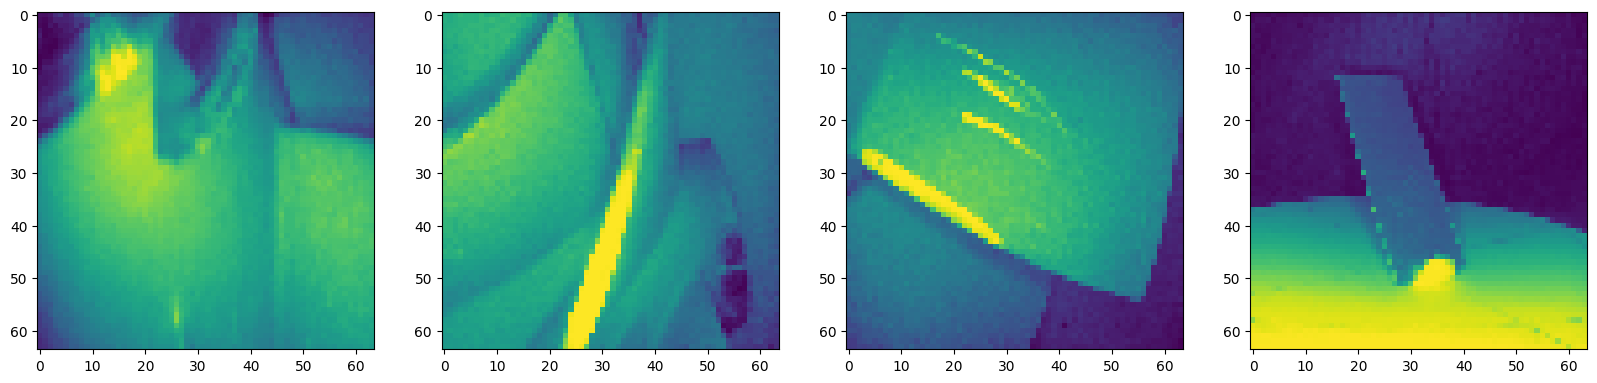

In [4]:
train_data_iterator = train_data.as_numpy_iterator()
batch = train_data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[:4]):
    ax[idx].imshow(img.astype(int))

In [15]:
name_train = os.listdir('/content/drive/My Drive/sample_data/Projects/Aircraft_Turbo_Defects/images/train')
name_val = os.listdir('/content/drive/My Drive/sample_data/Projects/Aircraft_Turbo_Defects/images/val')

print("Names of the train images:", name_train)
print("Names of the validation images:", name_val)

Names of the train images: ['11_flip.jpg', '12.jpg', '12_3.jpg', '13_rot2.jpg', '12_rot3.jpg', '11_1.jpg', '10.jpg', '13.jpg', '12_1.jpg', '13_1.jpg', '13_rot1.jpg', '11_rot1.jpg', '13_2.jpg', '11_rot3.jpg', '13_4.jpg', '13_3.jpg', '10_rot1.jpg', '12_flip0.jpg', '12_rot2.jpg', '13_flip1.jpg', '12_2.jpg', '11_flip1.jpg', '11_2.jpg', '12_flip1.jpg', '1.jpg', '10_flip0.jpg', '11_flip0.jpg', '10_flip.jpg', '12_rot1.jpg', '13_rot3.jpg', '10_rot2.jpg', '13_flip.jpg', '13_flip0.jpg', '10_1.jpg', '12_flip.jpg', '11_rot2.jpg', '10_flip1.jpg', '10_rot3.jpg', '11.jpg', '15_2.jpg', '16_flip.jpg', '17_1.jpg', '18_rot2.jpg', '14.jpg', '18_flip0.jpg', '16_rot3.jpg', '16_rot1.jpg', '14_flip.jpg', '18_flip1.jpg', '15_1.jpg', '16_flip0.jpg', '18_2.jpg', '15_3.jpg', '14_rot1.jpg', '17.jpg', '14_flip1.jpg', '15_rot3.jpg', '17_rot2.jpg', '14_flip0.jpg', '17_4.jpg', '18_1.jpg', '14_rot3.jpg', '16.jpg', '15_flip.jpg', '17_3.jpg', '15_rot2.jpg', '15.jpg', '17_flip1.jpg', '17_flip0.jpg', '16_rot2.jpg', '17_rot

Reading the category and the location of the data in the labels file

In [20]:
# Folder Path
path_train = "/content/drive/My Drive/sample_data/Projects/Aircraft_Turbo_Defects/labels/train"
label_train = os.listdir('/content/drive/My Drive/sample_data/Projects/Aircraft_Turbo_Defects/labels/train')
label_val = os.listdir('/content/drive/My Drive/sample_data/Projects/Aircraft_Turbo_Defects/labels/val')
for name in label_train:
  text_file = open('/content/drive/My Drive/sample_data/Projects/Aircraft_Turbo_Defects/labels/train/'+name,'r')
  line_list = text_file.readlines();
  #for each line from the list, print the line
  for line in line_list:
    print(line)
  text_file.close() #don't forget to close the file

0 0.336091 0.492765 0.243873 0.245177

0 0.559589 0.510852 0.279105 0.405145

0 0.376685 0.521302 0.312806 0.060289

2 0.897978 0.271905 0.031250 0.069534

0 0.640876 0.554075 0.388666 0.174326

0 0.656350 0.741115 0.381029 0.120098

0 0.721661 0.195740 0.412071 0.338424

0 0.320925 0.503416 0.201287 0.239952

0 0.559743 0.468047 0.231005 0.374196

2 0.396552 0.413012 0.211207 0.246585

3 0.210611 0.872396 0.307878 0.078738

0 0.259804 0.790394 0.382966 0.325965

0 0.262102 0.408762 0.478860 0.349678

0 0.142616 0.857918 0.276654 0.182074

0 0.582974 0.298706 0.092672 0.130122

1 0.289511 0.685478 0.050287 0.052480

1 0.366020 0.670022 0.055316 0.054637

1 0.406609 0.677211 0.037356 0.035945

<annotation>

	<folder>img</folder>

	<filename>bandicam 2023-04-06 19-30-24-749.jpg</filename>

	<path>C:\Users\maoyi\Desktop\frb\230405\img\bandicam 2023-04-06 19-30-24-749.jpg</path>

	<source>

		<database>Unknown</database>

	</source>

	<size>

		<width>1392</width>

		<height>1391</height>
